In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import ipywidgets
from ipywidgets import interact, interactive, Dropdown, widgets
from IPython.display import clear_output, display, HTML

In [3]:
import os
import pickle
import pprint
from glob import glob
os.chdir('/home/users/alexno/sleep-staging')

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from h5py import File

from utils.plotting import plot_psg_hypnogram_hypnodensity
from utils.plotting import plot_hypnodensity

In [4]:
df = pd.read_csv('overview_file_cohortsEM-ling1.csv')
display(df.head())
available_predictions = glob("experiments/**/SSC-WSC_test_predictions.pkl", recursive=True)
pprint.pprint(available_predictions)

,Index,ID,ID-ling,Cohort,Diagnosis,Label,Sleep scoring training data,Sleep scoring test data,Narcolepsy training data,Narcolepsy test data,Replication data,High pre-test,CSF hypocretin-1,DQ0602,Added by Alex
0,NaN,SSC_NARCO_1508_1,1508,SSC,'T1 NARCOLEPSY',1,0,1,1,0,0,1,na,1,1
1,NaN,SSC_NARCO_1534_1,1534,SSC,'T1 NARCOLEPSY',1,0,1,1,0,0,1,na,1,1
2,NaN,SSC_NARCO_1538_1,1538,SSC,'T1 NARCOLEPSY',1,0,1,0,1,0,1,na,1,1
3,NaN,SSC_NARCO_1647_1,1647,SSC,'T1 NARCOLEPSY',1,0,1,1,0,0,1,na,1,1
4,1267.0,SSC_1958_1,1958,SSC,'T1 NARCOLEPSY',1,0,1,1,0,0,1,0,0,0


['experiments/massc/avg_kw21_rnn128/20201209_025443/SSC-WSC_test_predictions.pkl',
 'experiments/massc/att30/20201124_080609/SSC-WSC_test_predictions.pkl',
 'experiments/massc/avg_kw21/20201126_043826/SSC-WSC_test_predictions.pkl']


In [9]:
selected_experiment = 'experiments/massc/avg_kw21/20201126_043826/SSC-WSC_test_predictions.pkl'
with open(selected_experiment, 'rb') as f:
    predictions = pickle.load(f)
list_studies = list(predictions.keys())
df_preds = pd.read_csv(os.path.join(os.path.dirname(selected_experiment), 'SSC-WSC_test_results.csv'), index_col=0)
df_preds = pd.merge(left=df_preds, right=df[['ID', 'Diagnosis', 'Label']], how='left', right_on='ID', left_on='SubjectID')
display(df_preds.query('Label == 0').sort_values('Balanced accuracy', ascending=False).head())

,FileID,SubjectID,Window,Case,Accuracy,Balanced accuracy,Kappa,F1,Precision,Recall,...,Precision - N3,Recall - N3,Support - N3,F1 - REM,Precision - REM,Recall - REM,Support - REM,ID,Diagnosis,Label
52,A1038_4 172720.h5,A1038_4 172720,1 s,all,0.849057,0.894873,0.795451,0.830931,0.806470,0.894873,...,0.548148,0.986667,75.0,0.985782,0.971963,1.000000,104.0,A1038_4 172720,'NON-NARCOLEPSY CONTROL',0
508,SSC_6856_1.h5,SSC_6856_1,1 s,all,0.876377,0.892037,0.811801,0.784684,0.733296,0.892037,...,0.480519,1.000000,37.0,0.880000,0.785714,1.000000,33.0,SSC_6856_1,'NON-NARCOLEPSY CONTROL',0
150,C1040_4 181859.h5,C1040_4 181859,1 s,all,0.883333,0.888253,0.817163,0.776490,0.769768,0.888253,...,0.842593,0.900990,101.0,0.973294,0.959064,0.987952,166.0,C1040_4 181859,'NON-NARCOLEPSY CONTROL',0
507,SSC_6854_1.h5,SSC_6854_1,1 s,all,0.831891,0.884168,0.776560,0.818131,0.812352,0.884168,...,0.847134,1.000000,133.0,0.921348,0.901099,0.942529,87.0,SSC_6854_1,'NON-NARCOLEPSY CONTROL',0
220,C9145_2 172540.h5,C9145_2 172540,1 s,all,0.840263,0.883908,0.773819,0.750679,0.725847,0.883908,...,0.407407,1.000000,55.0,0.945736,0.978610,0.915000,200.0,C9145_2 172540,'NON-NARCOLEPSY CONTROL',0


In [10]:
# selected_record = 'SSC_4723_1.h5'
# selected_record = 'A1038_4 172720.h5'
# selected_record = 'SSC_6856_1.h5'
selected_record = 'SSC_6542_1.h5'
record = predictions[selected_record]
print(record.keys())
n_epochs = len(record['stable_sleep'])
record_duration_seconds = n_epochs * 30
print('true:', record['true'].shape)
print('record:', record['logits'].shape)
print('predicted:', record['predicted'].shape)
print(record_duration_seconds)

dict_keys(['true', 'true_label', 'predicted', 'predicted_label', 'stable_sleep', 'logits', 'seq_nr'])
true: (970, 5)
record: (29100, 5)
predicted: (970, 5)
29100


### SSC_6542_1 - Narcolepsy type 1

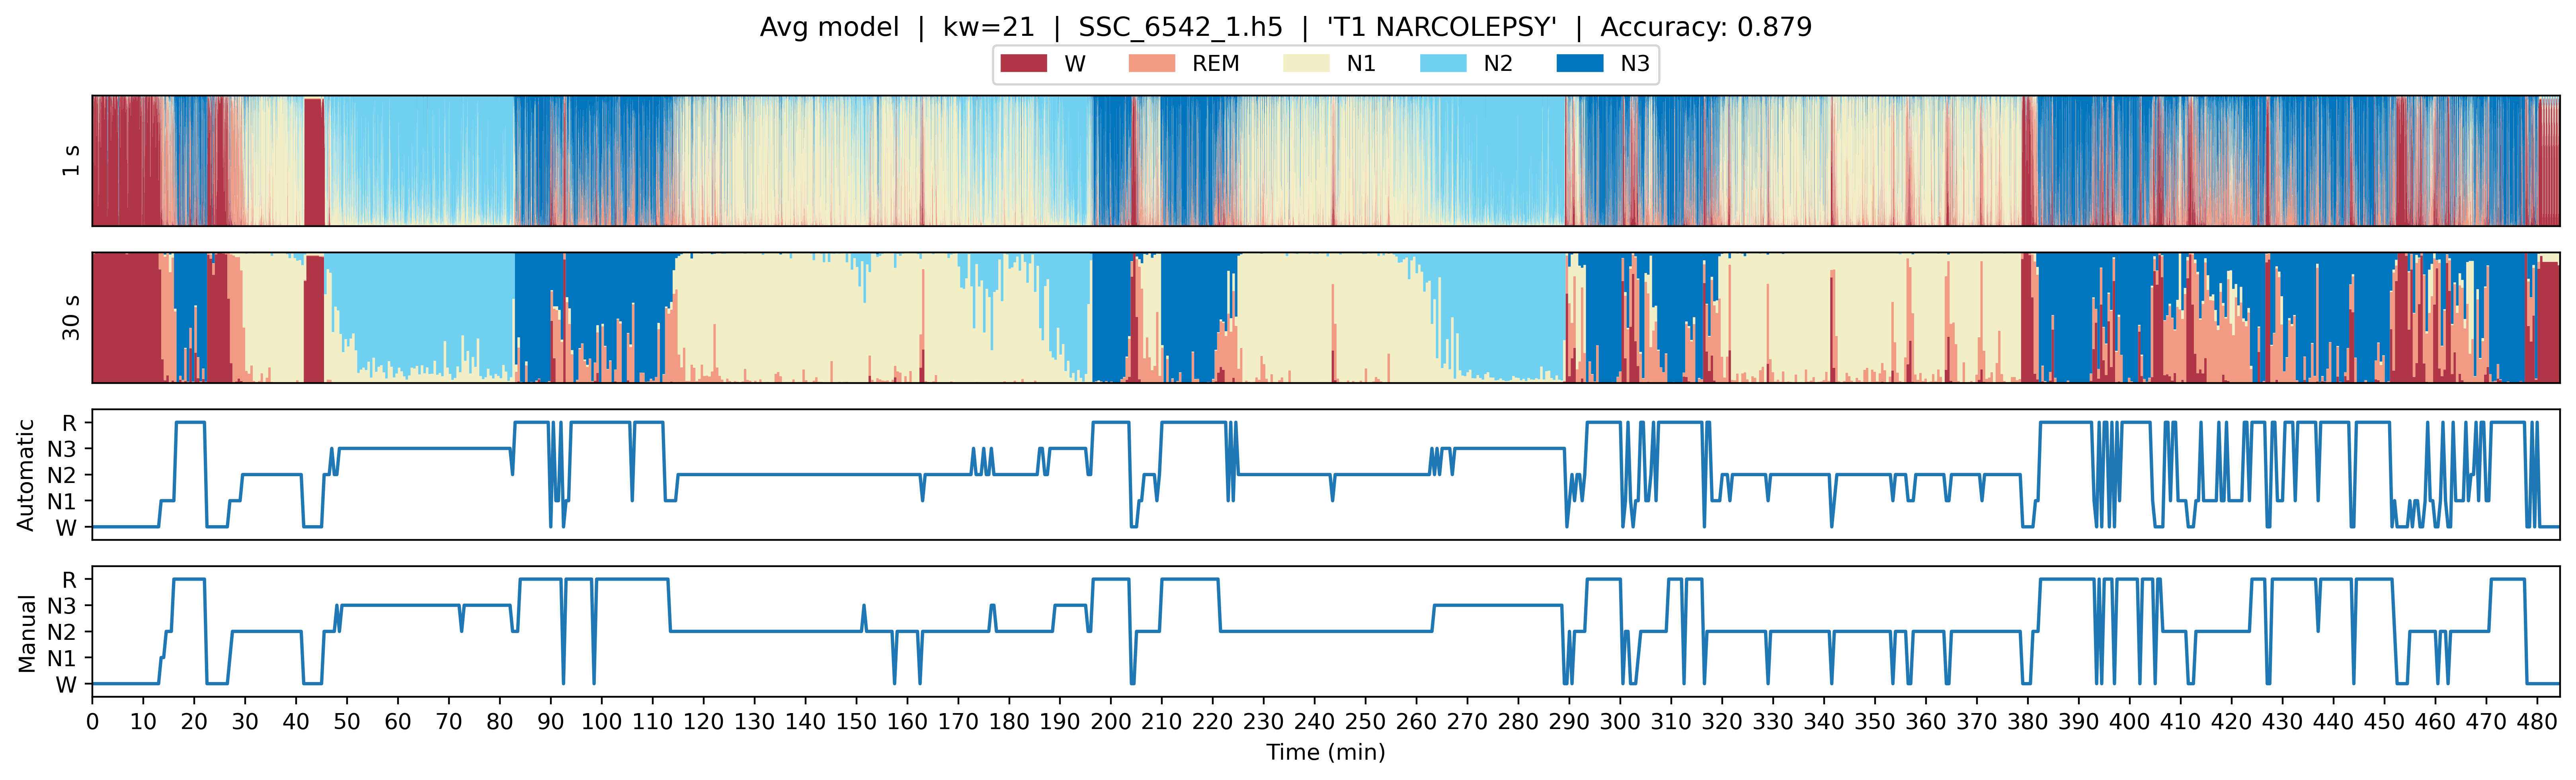

In [11]:
selected_record = 'SSC_6542_1.h5'
record = predictions[selected_record]
plot_hypnodensity(
    record['logits'], 
    record['predicted'], 
    record['true'], 
    title=("Avg model  |  " +
           "kw=21  |  " +
           f"{selected_record}  |  " +
           f"{df_preds.loc[df_preds['FileID'] == selected_record]['Diagnosis'].values[0]}  |  " +
           f"Accuracy: {df_preds.loc[df_preds['FileID'] == selected_record]['Balanced accuracy'].values[0]:.3f}")
)

(5, 601)


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

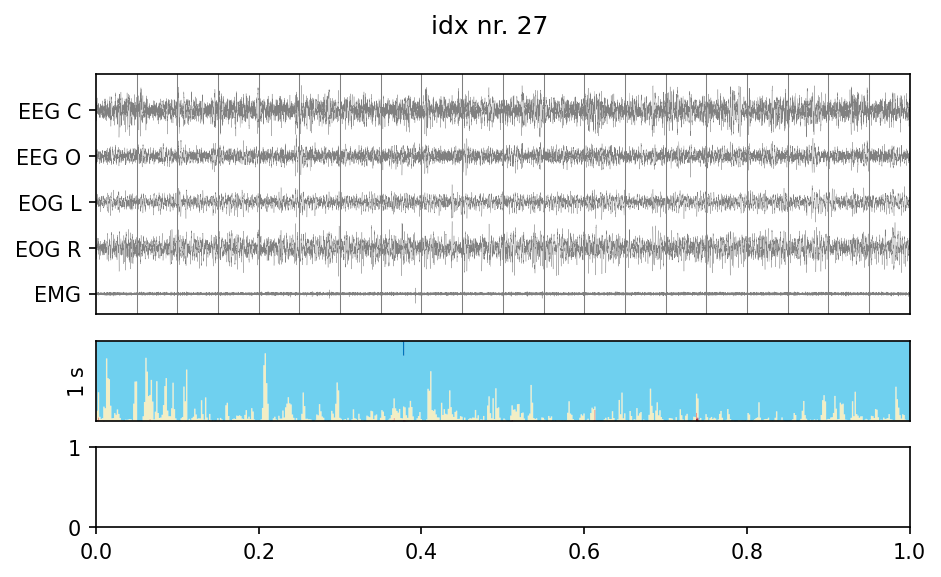

In [39]:
plot_psg_hypnogram_hypnodensity(
    selected_record, 
    record_predictions=record, 
    seq_idx=27, 
    interval=10
)

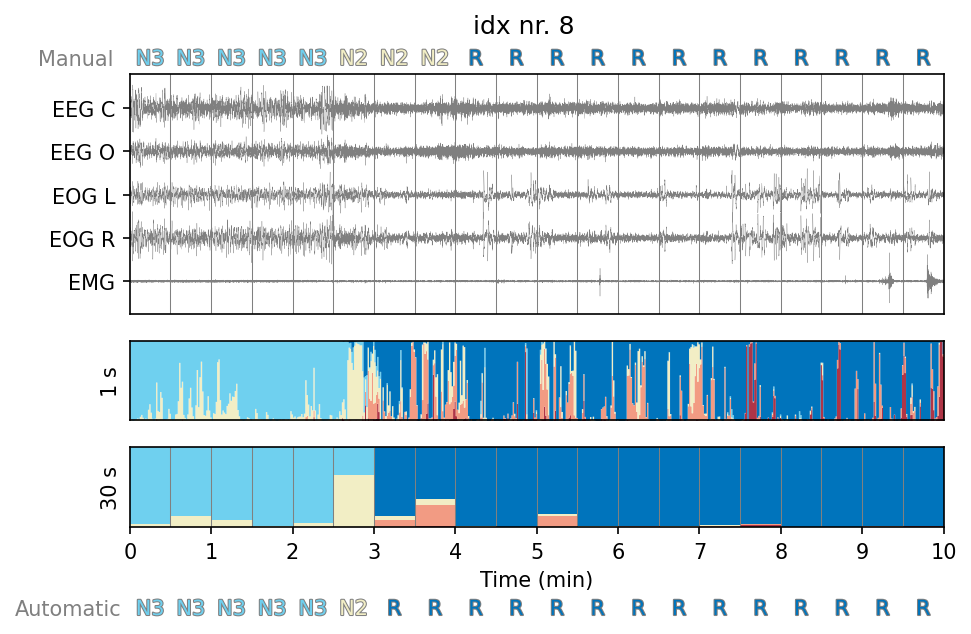

In [36]:
plot_psg_hypnogram_hypnodensity(
    selected_record, 
    record_predictions=record, 
    seq_idx=8
)

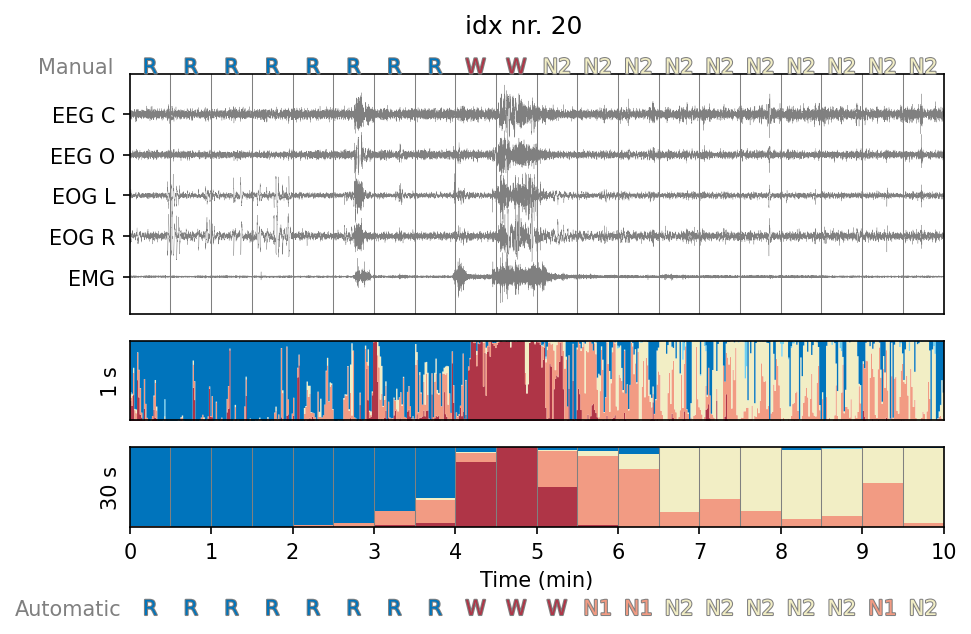

In [61]:
plot_psg_hypnogram_hypnodensity(
    selected_record, 
    record_predictions=record, 
    seq_idx=20,
    interval=10,
    save_path=f'{selected_record}-seq20.png'
)

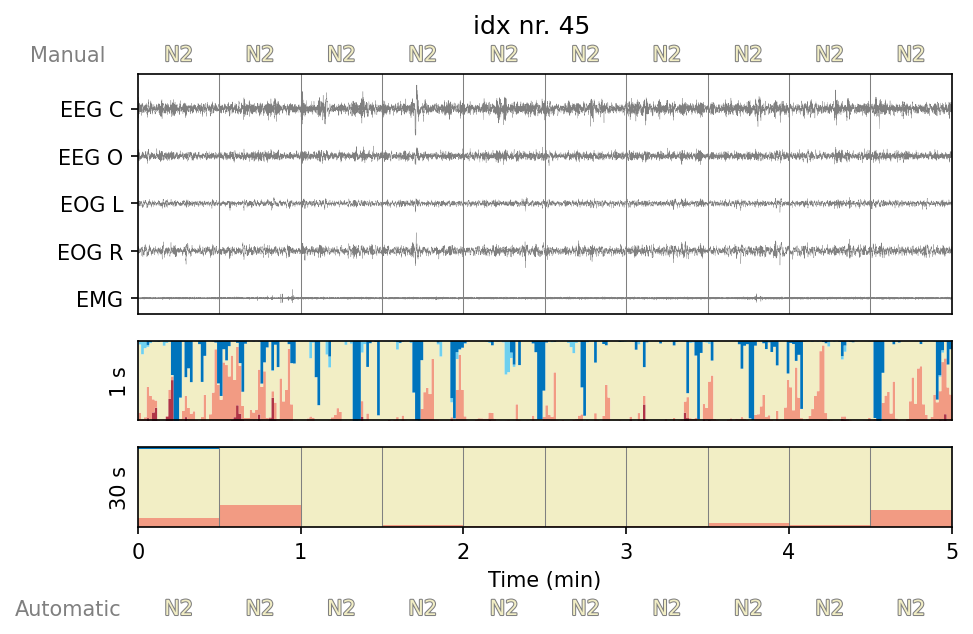

In [41]:
plot_psg_hypnogram_hypnodensity(
    selected_record, 
    record_predictions=record, 
    seq_idx=45,
    interval=5
)